In [2]:
# import libraries
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

from src import drop_column_using_vif_, show_vif_values

import imageio
from statsmodels.stats.outliers_influence import variance_inflation_factor


**VIF and Multi-linearity**

In [3]:
# loading the data
Dataframe_2018_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2018_normed.csv"))
Dataframe_2019_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2019_normed.csv"))
Dataframe_2020_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2020_normed.csv"))
Dataframe_2021_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2021_normed.csv"))
Dataframe_2022_normed = pd.read_csv(os.path.join("data","OperatingData","Df_2022_normed.csv"))

In [4]:
Merged_dataframe_2018_2022 = pd.read_csv(os.path.join("data","Regression2018_2022","Merged2018_2022.csv"))

In [5]:
# define the dict
dataframes_normed = {'Dataframe_2018_normed': Dataframe_2018_normed,
                     'Dataframe_2019_normed': Dataframe_2019_normed,
                     'Dataframe_2020_normed': Dataframe_2020_normed,
                     'Dataframe_2021_normed': Dataframe_2021_normed,
                     'Dataframe_2022_normed': Dataframe_2022_normed  
}

*define the dependant variables, independant variables and constant*

*calculate the VIFs*

In [6]:
# Create a yeas' list
years = ['2018', '2019', '2020', '2021', '2022']

In [7]:

vif_data = pd.DataFrame()
for year in years:
    # set the columns for calculating VIFs
    X_vars = [f'Finance_Secure_{year}', f'Environment_{year}', f'Employment_{year}', 
            f'Healthy_{year}', f'Safety_{year}', f'Decent_Home_{year}', f'Connections_{year}']
    
    # add the constatnt for calculating VIF
    X = sm.add_constant(dataframes_normed[f'Dataframe_{year}_normed'][X_vars])

 
    vif_data[f'feature_{year}'] = X.columns
    vif_data[f'VIF_{year}'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)
vif_data.to_csv(os.path.join("AnalysisResult","VIF_results_18_22.csv"))


          feature_2018  VIF_2018         feature_2019  VIF_2019  \
0                const  1.000000                const  1.000000   
1  Finance_Secure_2018  1.628835  Finance_Secure_2019  1.410548   
2     Environment_2018  2.496728     Environment_2019  2.668788   
3      Employment_2018  2.059287      Employment_2019  2.289789   
4         Healthy_2018  1.735321         Healthy_2019  1.762400   
5          Safety_2018  2.152249          Safety_2019  1.501046   
6     Decent_Home_2018  1.277498     Decent_Home_2019  2.306162   
7     Connections_2018  2.828593     Connections_2019  2.568227   

          feature_2020  VIF_2020         feature_2021  VIF_2021  \
0                const  1.000000                const  1.000000   
1  Finance_Secure_2020  1.910051  Finance_Secure_2021  1.527413   
2     Environment_2020  1.647512     Environment_2021  1.508008   
3      Employment_2020  3.047508      Employment_2021  1.648603   
4         Healthy_2020  1.633568         Healthy_2021  1.2758

In [8]:

merged_vif_data = pd.DataFrame()

# set the columns for calculating VIFs
X_vars = ['Finance_Secure', 'Environment', 'Employment', 
            'Healthy', 'Safety', 'Decent_Home', 'Connections']
    
# add the constatnt for calculating VIF
X_merge = sm.add_constant(Merged_dataframe_2018_2022[X_vars])

 
merged_vif_data[f'feature_18_22'] = X_merge.columns
merged_vif_data[f'VIF_18_22'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(merged_vif_data)
merged_vif_data.to_csv(os.path.join("AnalysisResult","Merged_VIF_results_18_22.csv"))


    feature_18_22  VIF_18_22
0           const   1.000000
1  Finance_Secure   1.336619
2     Environment   1.526039
3      Employment   1.335429
4         Healthy   1.102637
5          Safety   1.576754
6     Decent_Home   1.132857
7     Connections   1.086470


In [13]:
VIF_summary = pd.DataFrame()
VIF_summary['VIF_2018'] = vif_data['VIF_2018']
VIF_summary['VIF_2019'] = vif_data['VIF_2019']
VIF_summary['VIF_2020'] = vif_data['VIF_2020']
VIF_summary['VIF_2021'] = vif_data['VIF_2021']
VIF_summary['VIF_2022'] = vif_data['VIF_2022']
VIF_summary['VIF_18_22'] = merged_vif_data['VIF_18_22']

In [ ]:
# drop the constant row
VIF_summary.drop(0,axis=0, inplace=True)

In [ ]:
VIF_summary = VIF_summary.rename(index={1:'Finance_Secure', 2:'Environment', 3:'Employment', 4:'Healthy', 5:'Safety', 6:'Decent_Home', 7:'Connections'})


In [20]:
VIF_summary_trans = VIF_summary.transpose()

In [21]:
VIF_summary_trans

,Finance_Secure,Environment,Employment,Healthy,Safety,Decent_Home,Connections
VIF_2018,1.628835,2.496728,2.059287,1.735321,2.152249,1.277498,2.828593
VIF_2019,1.410548,2.668788,2.289789,1.762400,1.501046,2.306162,2.568227
VIF_2020,1.910051,1.647512,3.047508,1.633568,1.662231,1.261027,1.481751
VIF_2021,1.527413,1.508008,1.648603,1.275865,1.640707,1.213356,1.409773
VIF_2022,1.336619,1.526039,1.335429,1.102637,1.576754,1.132857,1.086470
VIF_18_22,1.336619,1.526039,1.335429,1.102637,1.576754,1.132857,1.086470


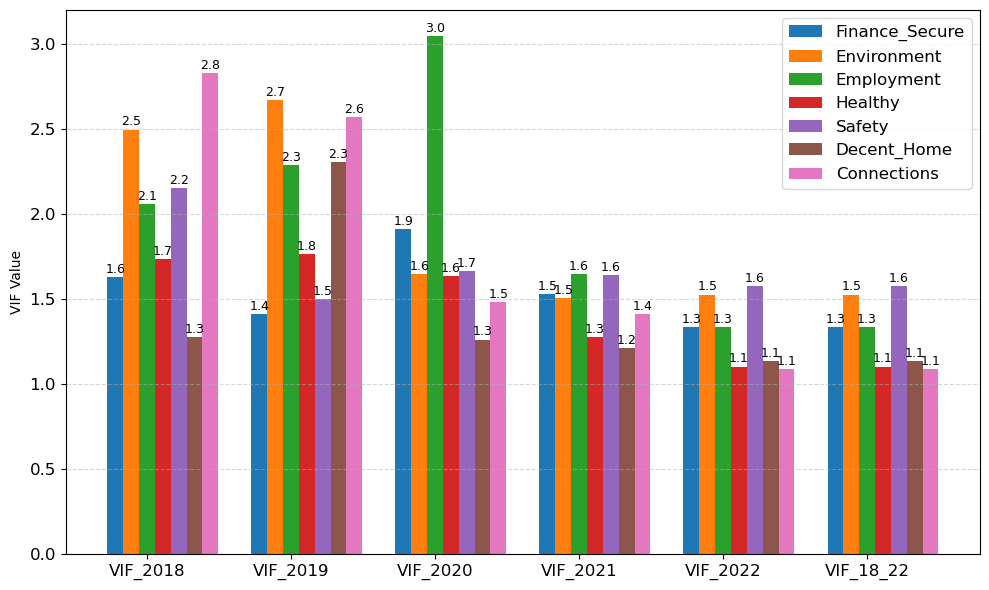

In [34]:
# 绘制多主体柱状图
fig, ax = plt.subplots(figsize=(10, 6))

# 设置柱状图的宽度
bar_width = 0.11


# 创建一个列表来保存每个主体的位置
x = range(len(VIF_summary_trans.index))

# 绘制网格线并设置透明度
ax.grid(axis='y', linestyle='--', alpha=0.7)

# 绘制每个主体的柱状图并标注数据
for i, col in enumerate(VIF_summary_trans.columns):
    bars = ax.bar([pos + i * bar_width for pos in x], VIF_summary_trans[col], width=bar_width, label=col)
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',  
                    xy=(bar.get_x() + bar.get_width() / 2, height),  # label's location
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center',  
                    fontsize=9,  
                    )


# set x label 
ax.set_xticks([pos + 2 * bar_width for pos in x])
ax.set_xticklabels(VIF_summary_trans.index)

ax.legend(fontsize=12)

plt.ylabel('VIF Value')
plt.yticks(size=12)
plt.xticks(size=12)


plt.tight_layout()
plt.savefig(os.path.join("images","VIF_summary18-22.png"),bbox_inches='tight')
plt.show()